<a href="https://colab.research.google.com/github/guiaech/Rede_Neural_Sentimentos_tweets/blob/main/An%C3%A1lise_sentimentos_rede_neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data = pd.read_csv("tweets_classificados.csv")

In [ ]:
data.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Observação,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(8199, 26)

In [ ]:
data.groupby(by=['Classificacao'])['Classificacao'].count()

Classificacao
Negativo    2446
Neutro      2453
Positivo    3300
Name: Classificacao, dtype: int64

In [ ]:
data['Sentiments'] = data['Classificacao'].replace({'Negativo': 1, 'Neutro': 2, 'Positivo':3}) 

In [ ]:
data

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Observação,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Sentiments
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8194,8194,Thu Feb 09 11:48:07 +0000 2017,"Trio é preso suspeito de roubo, tráfico e abus...",NaN,NaN,NaN,Ana Lúcia,lapiseirapentel,0,Positivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
8195,8195,Thu Feb 09 12:10:19 +0000 2017,"Trio é preso suspeito de roubo, tráfico e abus...",NaN,NaN,Belo Horizonte - Minas Gerais,Marcelo Rezende,Televans,0,Positivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
8196,8196,Thu Feb 09 12:04:17 +0000 2017,"Trio é preso suspeito de roubo, tráfico e abus...",NaN,NaN,Guarulhos - SP,Leonardo Nascimento,leonardogru,0,Positivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
8197,8197,Thu Feb 09 12:10:04 +0000 2017,"Trio é preso suspeito de roubo, tráfico e abus...",NaN,NaN,Brasil Natal/RN,Lucas Medeiros �©™,parabolicalucas,0,Positivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [ ]:
mask = data['Sentiments'].isin([1,2,3])
new_data = data[mask]
new_data.shape[0]

8199

In [ ]:
sentiments = new_data['Sentiments']
texts = new_data['Text']

df= pd.concat([sentiments, text], axis = 1)
df.head()

,Sentiments,Text
0,2,���⛪ @ Catedral de Santo Antônio - Governador ...
1,2,"� @ Governador Valadares, Minas Gerais https:/..."
2,2,"�� @ Governador Valadares, Minas Gerais https:..."
3,2,��� https://t.co/BnDsO34qK0
4,1,��� PSOL vai questionar aumento de vereadores ...


In [ ]:
df.shape[0]

8199

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


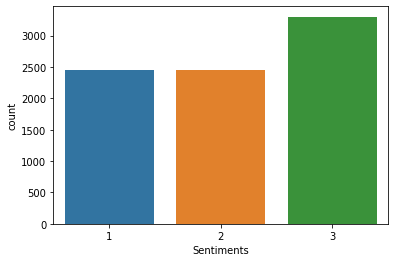

In [ ]:
import seaborn as sns
sns.countplot(df['Sentiments'])

In [ ]:
# Arrumando as frases. Vamos substituir todas as maiusculas por
# minusculas e tirar quaisquer pontuaçoes desnecessárias dos dados
# (tanto de treinamento quanto de teste):

import re # Esta é a biblioteca ReGex, usada para auxiliar a localização
          # de padrões


accent_map = {u'\u00c0': u'A', u'\u00c1': u'A', u'\u00c2': u'A', u'\u00c3': u'A', u'\u00c4': u'A', u'\u00c5': u'A', u'\u00c6': u'A', u'\u00c7': u'C', u'\u00c8': u'E', u'\u00c9': u'E', u'\u00ca': u'E', u'\u00cb': u'E', u'\u00cc': u'I', u'\u00cd': u'I', u'\u00ce': u'I', u'\u00cf': u'I', u'\u00d0': u'D', u'\u00d1': u'N', u'\u00d2': u'O', u'\u00d3': u'O', u'\u00d4': u'O', u'\u00d5': u'O', u'\u00d6': u'O', u'\u00d7': u'x', u'\u00d8': u'0', u'\u00d9': u'U', u'\u00da': u'U', u'\u00db': u'U', u'\u00dc': u'U', U'\u00dd': u'Y', u'\u00df': u'B', u'\u00e0': u'a', u'\u00e1': u'a', u'\u00e2': u'a', u'\u00e3': u'a', u'\u00e4': u'a', u'\u00e5': u'a', u'\u00e6': u'a', u'\u00e7': u'c', u'\u00e8': u'e', u'\u00e9': u'e', u'\u00ea': u'e', u'\u00eb': u'e', u'\u00ec': u'i', u'\u00ed': u'i', u'\u00ee': u'i', u'\u00ef': u'i', u'\u00f1': u'n', u'\u00f2': u'o', u'\u00f3': u'o', u'\u00f4': u'o', u'\u00f5': u'o', u'\u00f6': u'o', u'\u00f8': u'0', u'\u00f9': u'u', u'\u00fa': u'u', u'\u00fb': u'u', u'\u00fc': u'u'}


def accent_remove(m):
    return accent_map[m.group(0)]

def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
    
def clean_tts(list_to_clean):
    for idx, item in enumerate(list_to_clean):
        # transforma tudo para str
        list_to_clean[idx] = str(item)
        # retira todo o link https:// do tuite
        list_str = list_to_clean[idx].split()
        string = ' '.join([word for word in list_str if not re.search('https://t.co', word)])
        #remove acentos
        list_to_clean[idx] = re.sub(u'([\u00C0-\u00FC])', accent_remove, string.encode().decode('utf-8'))
        # remove emojis
        string = list_to_clean[idx].encode('ascii', 'ignore').decode('ascii')
        list_to_clean[idx] = remove_emoji(string)
        # deixa tudo em caixa baixa
        list_to_clean[idx] = list_to_clean[idx].lower()
        # substitui o restante dos caracteres desnecessarios
        string = list_to_clean[idx]
        list_to_clean[idx] = re.sub('[…•\-\(\)\&]', '', string)
        string = list_to_clean[idx]
        list_to_clean[idx] = re.sub('\W\s-', '', string)
        string = list_to_clean[idx]
        list_to_clean[idx] = re.sub('["º°/_]', ' ', string)
        # separa pontuações no final das palavras
        char = '...'
        string = list_to_clean[idx]
        res = [i for j in string.split(char) for i in (j, char)][:-1] 
        list_to_clean[idx] = ' '.join(res)
        char = '?'
        string = list_to_clean[idx]
        res = [i for j in string.split(char) for i in (j, char)][:-1] 
        list_to_clean[idx] = ' '.join(res) 
        char = '!'
        string = list_to_clean[idx]
        res = [i for j in string.split(char) for i in (j, char)][:-1] 
        list_to_clean[idx] = ' '.join(res)
        char = '.'
        string = list_to_clean[idx]
        res = [i for j in string.split(char) for i in (j, char)][:-1] 
        list_to_clean[idx] = ' '.join(res)
        char = ','
        string = list_to_clean[idx]
        res = [i for j in string.split(char) for i in (j, char)][:-1] 
        list_to_clean[idx] = ' '.join(res)
        # remove palavras de comprimento menor que 3
        string_list = list_to_clean[idx].split() 
        strings = [x for x in string_list if len(x)>2]
        list_to_clean[idx] = ' '.join(strings)
        # remove espaços desnecessarios
        string_list = list_to_clean[idx].split()
        list_to_clean[idx] = ' '.join(string_list)
    return list_to_clean

In [ ]:
texts_list = texts.to_list()

clean_texts = clean_tts(texts_list)
print(clean_texts[:20])

['catedral santo antonio governador valadares', 'governador valadares minas gerais', 'governador valadares minas gerais', '', 'psol vai questionar aumento vereadores prefeito justica politica estado minas', 'bom bandido morto deputado cabo julio condenado fica inelegivel por anos politica estado minas', '25% dos mineiros dizem nao torcer para time nenhum mesmo dentro estado com atleticomg cruzeiro', 'gigantesca barba mal destaque caderno cultura estado minas', 'governo minas travam disputa sobre depositos judiciais', 'com vcs fica pequena belo horizonte pron [bloizonti][10] capital estado com uma area aproximadamente 331', 'dai gente visita governador valadares que lugar esse mae gente tem uns parente mano onde nao tenho parente', 'bonita bonita #latergram #ibituruna #home governador valadares minas gerais', 'erro desconhecido mato alias secretaria estadual fazenda que assim nao precisa dinheiro nao governador', 'land: cantando estacoes arrasa globo ouro estado minas', 'land: cantando 

In [ ]:
sentiments = sentiments.to_list()

print(sentiments[:10])

[2, 2, 2, 2, 1, 2, 2, 2, 1, 2]


In [ ]:
all_text = []
for idx, item in enumerate(clean_texts):
    string = item

    for idx, item in enumerate(string.split(' ')):
        all_text.append(item)

print(all_text[:100])

['catedral', 'santo', 'antonio', 'governador', 'valadares', 'governador', 'valadares', 'minas', 'gerais', 'governador', 'valadares', 'minas', 'gerais', '', 'psol', 'vai', 'questionar', 'aumento', 'vereadores', 'prefeito', 'justica', 'politica', 'estado', 'minas', 'bom', 'bandido', 'morto', 'deputado', 'cabo', 'julio', 'condenado', 'fica', 'inelegivel', 'por', 'anos', 'politica', 'estado', 'minas', '25%', 'dos', 'mineiros', 'dizem', 'nao', 'torcer', 'para', 'time', 'nenhum', 'mesmo', 'dentro', 'estado', 'com', 'atleticomg', 'cruzeiro', 'gigantesca', 'barba', 'mal', 'destaque', 'caderno', 'cultura', 'estado', 'minas', 'governo', 'minas', 'travam', 'disputa', 'sobre', 'depositos', 'judiciais', 'com', 'vcs', 'fica', 'pequena', 'belo', 'horizonte', 'pron', '[bloizonti][10]', 'capital', 'estado', 'com', 'uma', 'area', 'aproximadamente', '331', 'dai', 'gente', 'visita', 'governador', 'valadares', 'que', 'lugar', 'esse', 'mae', 'gente', 'tem', 'uns', 'parente', 'mano', 'onde', 'nao', 'tenho']


In [ ]:
# Vamos então contar as palavras (para futuras análises - opcional)
from collections import Counter

counts = Counter(all_text)

In [ ]:
# E criar um vocabulário, ordenado a partir das palavras mais faladas
# Obs.: Este vocabulário é composto de palavras únicas, pois
# o método Counter() conta as aparições de cada palavra e
# retorna um vocabulário com o número de aparições e as strings
vocabulary = sorted(counts, key=counts.get, reverse=True)
print("Total de palavras em todos os tweets: {}".format(len(all_text)))
print("Total de palavras no vocabulario: {}".format(len(vocabulary)))

Total de palavras em todos os tweets: 84815
Total de palavras no vocabulario: 7226


In [ ]:
# Criando um novo dicionário, que mapeia cada palavra (a partir da que
# mais aparece) em números, começando de 1:
vocabulary_to_int = {}
int_to_vocabulary = {}
for i, word in enumerate(vocabulary, 1):
    vocabulary_to_int[word] = i
    int_to_vocabulary[i] = word

# Forma alternativa, utilizando dict comprehension
# vocabulary_to_int = {word: i for i, word in enumerate(vocabulary, 1)}

In [ ]:
# E agora transformando cada review em números
# e 'abusando' das list comprehensions:
texts_int = []
for review in clean_texts:
    texts_int.append([vocabulary_to_int[word] for word in review.split()])

In [ ]:
# Conferindo:
print("Palavras únicas: ", len(vocabulary_to_int))
print()
print("Review em formato token:\n", texts_int[3])

Palavras únicas:  7226

Review em formato token:
 []


In [ ]:
# E para uso futuro, vamos já deixar o vetor dos labels
# de sentimentos pronto. O label da posição x ('encoded_label[x]')
# corresponde ao review 'texts_set_int[x]':
import numpy as np

# Aqui vamos aproveitar para deixar as labels indexadas em 0, para evitar problemas futuros durante o treino da rede
encoded_labels = np.array([(int(sentiments[i])-1) for i in range(1,len(sentiments))])
                          
print(encoded_labels[0])

# E os dados de teste codificados:
texts_set_int = []
for review in texts_int:
    texts_set_int.append(review)

print()
print(texts_set_int[0])

1

[3712, 1822, 2143, 17, 49]


In [ ]:
# Para conferir se as conversões estão de acordo com o esperado...

review_49 = texts_set_int[49] # review em formato token
print(review_49)
review_49_words = ' '.join([int_to_vocabulary[i] for i in review_49]) # refazendo a conversão
print(review_49_words)
print()
print(sentiments[49])
# Obs.: a partir daqui, os dados estão "shifted" por uma casa a menos,
# isso pq nos dados anteriores tínhamos os cabeçalhos (aquele com os títulos
# das colunas em formato string).

[244, 245, 236, 125, 2708, 9, 3781, 3, 715, 755, 2706, 2707]
#beta #betalab #mg nos ultimos dois anos: governo pagou alvos lava jato

2


In [ ]:
# Vamos procurar por reviews "extremos", aqueles
# que podem "bagunçar" com o treinamento:

tamanho_reviews = Counter([len(x) for x in texts_set_int]) # Dict: {objeto: contagem}
print("Número total de reviews: {}".format(len(texts_set_int)))
print("Quantos reviews de tamanho nulo: {}".format(tamanho_reviews[0]))
print("Tamanho máximo de um review: {}".format(max(tamanho_reviews)))

Número total de reviews: 8199
Quantos reviews de tamanho nulo: 13
Tamanho máximo de um review: 22


In [ ]:
print(tamanho_reviews)

Counter({10: 1149, 11: 1099, 9: 954, 8: 904, 7: 883, 12: 653, 14: 614, 13: 534, 6: 402, 15: 361, 16: 231, 17: 103, 5: 81, 18: 72, 4: 62, 2: 25, 3: 20, 19: 19, 0: 13, 1: 13, 20: 5, 22: 1, 21: 1})


In [ ]:
tamanho = sorted([key for key in tamanho_reviews.keys()])
numero = [tamanho_reviews[lenght] for lenght in tamanho]

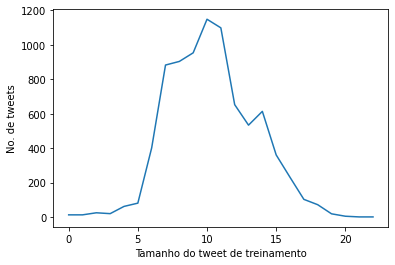

In [ ]:
import matplotlib.pyplot as plt
plt.plot(tamanho, numero)
plt.xlabel('Tamanho do tweet de treinamento')
plt.ylabel('No. de tweets')
plt.show()

In [ ]:
# Vamos então retirar os reviews de tamanho nulo e os
# seus respectivos labels dos reviews:

# Pegando os indices dos reviews de tamanho não nulo:
non_zero_idx_train = [i for i, review in enumerate(texts_set_int) if len(review) != 0]

In [ ]:
# Removendo os reviews nulos e seus labels:
train_set_int = [texts_set_int[i] for i in non_zero_idx_train]
encoded_labels = np.array([encoded_labels[i] for i,j in enumerate(non_zero_idx_train)])

print("Número de reviews antes da remoção dos reviews nulos: ", len(texts_set_int))
print("Número de reviews após a remoção dos reviews nulos: ", len(train_set_int))

Número de reviews antes da remoção dos reviews nulos:  8199
Número de reviews após a remoção dos reviews nulos:  8186


In [ ]:
print(len(encoded_labels))
print(len(train_set_int))

8186
8186


In [ ]:
def padding_features(review_ints, seq_length):
    ''' Retorna vetores (features) dos review_ints contidos
        ou preenchidos até o limite de tamanho seq_length
    '''
    
    # Aqui produzimos um vetor com a forma desejada de linhas x colunas:
    features = np.zeros((len(review_ints),seq_length), dtype=int)
    
    # Para cada review:
    for i, row in enumerate(review_ints):
        features[i, -len(row):] = np.array(row[:seq_length])
    
    return features

In [ ]:
seq_length = 22
features_train = padding_features(train_set_int, seq_length=seq_length)

# Para testar o código, podemos usar assert:
# assert len(features) == len(train_set_int), "As features devem ter o número de linhas igual ao numero de reviews"
# assert len(features[0]) == seq_length, "Cada linha deve ter o mesmo comprimento"

print(features_train[:3])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0 3712 1822 2143   17   49]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0   17   49    1    6]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0   17   49    1    6]]


In [ ]:
!pip install --upgrade tensorflow

In [ ]:
!pip install keras.utils

  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=1616093fa2ca0706a079311471728f4a096ad880d14454bc8d82b998e49de573
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils


In [ ]:
seed = 42

import random
import numpy as np
import tensorflow 

random.seed(seed)
np.random.seed(seed)
tensorflow.random.set_seed(seed)

from keras.preprocessing import sequence,text
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense,Dropout,Embedding,LSTM,Conv1D,GlobalMaxPooling1D,Flatten,MaxPooling1D,GRU,SpatialDropout1D,Bidirectional
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, confusion_matrix, recall_score, precision_score

In [ ]:
import re
def del_num(string):
    string = str(string)
    string = string.lower()
    string = re.sub('\W+\s', '', string)
    string = re.sub('\d+', '', string)
    string = re.sub('[\(\)/:*.-]', ' ', string)
    string = string.split()
    new_string = [i for i in string if len(i) > 2]
    string = ' '.join(new_string)
    return string

In [ ]:
### SELECIONANDO OS DADOS DE TREINAMENTO E AS LABELS ###
x = df['Text'].apply(del_num)
y = df['Sentiments'].apply(lambda x: x-1)

In [ ]:
# Aqui eu já indexei os sentimentos em 0 (0 - negativo, 1- neutro, 2- positivo)
print("Tweet: ", x[1],"\nSentiment: ", y[1])

Tweet:  governador valadaresminas gerais https bthidjcsf 
Sentiment:  1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0, shuffle=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


2    3300
1    2453
0    2446
Name: Sentiments, dtype: int64

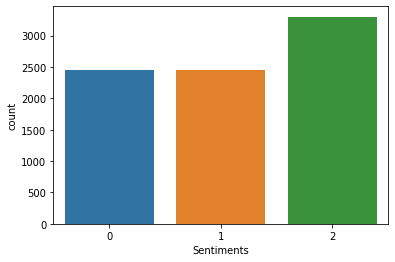

In [ ]:
### VERIFICANDO O BALANCEAMENTO DE CADA CLASSE DE INTERESSE ###
sns.countplot(y)
y.value_counts()

In [ ]:
from sklearn.utils import resample

X = pd.concat([x_train, y_train], axis=1)
X.head()

,Text,Sentiments
3977,@panichiraphaelestá ruim para estado minas ger...,0
2190,risco calote estados com união crescepoliticae...,1
4958,vereadores governador valadares não terão salá...,1
4740,secretaria governo minas orienta novos prefeit...,1
2658,@ary_antiptescarniogovernador fernando acronim...,0


In [ ]:
category0 = X[X.Sentiments==0]
category1 = X[X.Sentiments==1]
category2 = X[X.Sentiments==2]

In [ ]:
number=len(category1)
category0_upsampled = resample(category0,
                          replace=True,
                          n_samples=number,
                          random_state=1)
category1_upsampled = resample(category1,
                          replace=True,
                          n_samples=number,
                          random_state=1)
category2_upsampled = resample(category2,
                          replace=True,
                          n_samples=number,
                          random_state=1)

In [ ]:
resampled_data = pd.concat([category0_upsampled, category1_upsampled, category2_upsampled])

In [ ]:
resampled_data.Sentiments.value_counts()

2    1952
1    1952
0    1952
Name: Sentiments, dtype: int64

In [ ]:
x_train = resampled_data['Text']
y_train = resampled_data['Sentiments']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


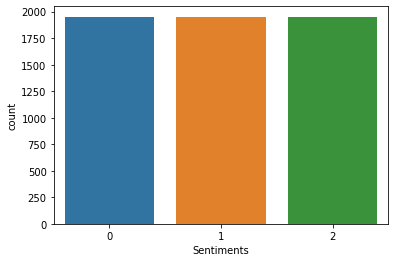

In [ ]:
sns.countplot(y_train)

In [ ]:
tam_vocab = len(vocabulary)
tokenizer = Tokenizer(num_words=tam_vocab)
tokenizer.fit_on_texts(list(x_train))
tokenizer.fit_on_texts(list(x_test))

In [ ]:
X_train = tokenizer.texts_to_sequences(x_train)
X_test = tokenizer.texts_to_sequences(x_test)
X_train = pad_sequences(X_train, maxlen=22)
X_test = pad_sequences(X_test, maxlen=22)
print(len(X_train))
X_train[:5]

5856


array([[   0,    0,    0,    0,    0,    0,    0, 1068, 1069,   38, 1881,
           2,   11, 1274, 1275, 1161,    3,  102, 1276,   32, 1609, 2399],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0, 3412, 1882,    2,   11,    7,   10,    9,   57, 3413],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   87,   52,   49,    7,   10,    9,    5,    1,   88],
       [   0,    0,    0,    0,    0,    0,    0,    0,    6,    8,  239,
          35,   30,    4,    2,   13,   18,   32,    1, 5384,    1, 5385],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
         806,   16,   96,  298,    2,  193,  299,   16,    5,    1, 5386]],
      dtype=int32)

In [ ]:
Y_train = to_categorical(y_train.values)
print(len(Y_train))
Y_train.shape

5856


(5856, 3)

In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, y_test.shape)

(5856, 22) (5856, 3) (1640, 22) (1640,)


In [ ]:
train_x, val_x, train_y, val_y = train_test_split(X_train, Y_train, test_size=0.2)

In [ ]:
max_features = len(vocabulary)

In [ ]:
model=Sequential()
model.add(Embedding(max_features,512,mask_zero=True))
model.add(LSTM(256,dropout=0.4, recurrent_dropout=0.4,return_sequences=True))
model.add(LSTM(512,dropout=0.5, recurrent_dropout=0.5,return_sequences=False))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 512)         3699712   
                                                                 
 lstm (LSTM)                 (None, None, 256)         787456    
                                                                 
 lstm_1 (LSTM)               (None, 512)               1574912   
                                                                 
 dense (Dense)               (None, 3)                 1539      
                                                                 
Total params: 6,063,619
Trainable params: 6,063,619
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
epochs = 50
batch_size = 128

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/50
37/37 [==============================] - 50s 1s/step - loss: 0.4170 - accuracy: 0.8542 - val_loss: 0.1189 - val_accuracy: 0.9573
Epoch 2/50
37/37 [==============================] - 45s 1s/step - loss: 0.0585 - accuracy: 0.9853 - val_loss: 0.1276 - val_accuracy: 0.9710
Epoch 3/50
37/37 [==============================] - 45s 1s/step - loss: 0.0165 - accuracy: 0.9953 - val_loss: 0.1414 - val_accuracy: 0.9710
Epoch 4/50
37/37 [==============================] - 45s 1s/step - loss: 0.0070 - accuracy: 0.9981 - val_loss: 0.1936 - val_accuracy: 0.9718
Epoch 5/50
37/37 [==============================] - 45s 1s/step - loss: 0.0033 - accuracy: 0.9989 - val_loss: 0.2237 - val_accuracy: 0.9727
Epoch 6/50
37/37 [==============================] - 45s 1s/step - loss: 0.0019 - accuracy: 0.9998 - val_loss: 0.2425 - val_accuracy: 0.9727
Epoch 7/50
37/37 [==============================] - 45s 1s/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.2647 - val_accuracy: 0.9753
Epoch 8/50
37/37 [==

In [ ]:
predictions = model.predict(X_test, batch_size=batch_size, verbose=1).argmax(axis=1)


13/13 [==============================] - 3s 248ms/step


In [ ]:
pd.DataFrame(confusion_matrix(y_test, predictions))

,0,1,2
0,438,21,10
1,15,452,34
2,1,17,652


In [ ]:
accuracy_score(y_test, predictions)

0.9402439024390243

In [ ]:
f1_score(y_test, predictions, average=None)

array([0.94907909, 0.91220989, 0.95461201])